<a href="https://colab.research.google.com/github/kipdallaris/Python451Dallaris/blob/main/dallarishomework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 03: You will run Logistic Regression, K-Nearest Neighbor, Decision Tree, and Random Forest Classifier to predict survival for the Titanic Dataset.

## Then, you will check and print the performance of your model.

---------

#### First, get all your required packages. Note: the list below is not exhaustive, if you need more packages, please import them as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### We are going to obtain the Titanic dataset from DataScienceDojo's github page. Thank you to them for the readily available data.

Here is the link: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Import the file as a DataFrame called `titanic`.

In [3]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **`Survived`** is your target variable, also known as your dependent variable.

## Your attributes/features/independent variables will help predict survival on the Titanic.

### But first, you need to preprocess the data.


*  Note: **`Survived`** is your target variable (**Y**).

* **`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`**, and **`Fare`** will certainly be important predictors of whether a passenger survived or not. Hence, they will be included in your attributes list (**X**).

* The **`Name`, `Ticket`**, and **`Cabin`** are not useful features. Someone's name has no bearing on whether they survive or not. Similarly, a ticket number is just a unique identifier for a passenger - it is not meaningful, ordered data. So we can drop these 3. **NOTE**: NEVER drop variables from the original dataset. Either create a new df for relevant features, or create a copy of titanic and then drop the ones you do not want.
*   Where they **`Embarked`** can be meaningful, but the data is a string variable. Let us convert it to an integer. This can be done with **`np.where`** or with **label encoding**. I will help you with this step. You have to do the rest of the preprocessing steps.






In [4]:
titanic.Embarked.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


### Perfect! Now You can use Pclass, Sex, Age, SibSp, Parch, Fare, and embarked as your features.

Step 1: First shuffle your dataset.
Step 2: Create X and Y arrays. You can refer to the class file for this. Y is the target (single column), X comprises all the relevant features.

In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic_cleaned = titanic.copy()
titanic_cleaned.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0], inplace=True)

titanic_cleaned['Sex'] = np.where(titanic_cleaned['Sex'] == 'male', 1, 0)

label_encoder = LabelEncoder()
titanic_cleaned['Embarked'] = label_encoder.fit_transform(titanic_cleaned['Embarked'])

titanic_cleaned = shuffle(titanic_cleaned, random_state=42)

Y = titanic_cleaned['Survived'].values
X = titanic_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)


<ipython-input-7-4ff90f189344>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
<ipython-input-7-4ff90f189344>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [8]:
from sklearn.utils import shuffle

titanic_cleaned = shuffle(titanic_cleaned, random_state=42)

Y = titanic_cleaned['Survived'].values
X = titanic_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (891, 7)
Shape of Y: (891,)


## 1. Logistic Regression

### Use this model to predict survival on the Titanic.    
## Part I:
### First, use a 80:20 train-test split. Run your logistic regression prediction model.  
### Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

## Part II: Repeat all the above with a 60:40 split.   

## Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?


80:20 Split - Logistic Regression Results
Accuracy: 0.6536
Precision: 0.4000
Recall (Sensitivity): 0.0328
Specificity: 0.9746
F1 Score: 0.0606
Confusion Matrix:
 [[115   3]
 [ 59   2]]


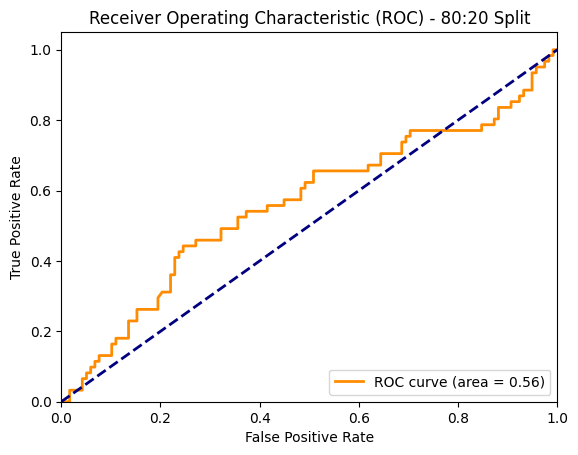

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sensitivity and Specificity
sensitivity = recall
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Display metrics
print("80:20 Split - Logistic Regression Results")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - 80:20 Split')
plt.legend(loc="lower right")
plt.show()

60:40 Split - Logistic Regression Results
Accuracy: 0.6275
Precision: 0.5000
Recall (Sensitivity): 0.0075
Specificity: 0.9955
F1 Score: 0.0148
Confusion Matrix:
 [[223   1]
 [132   1]]


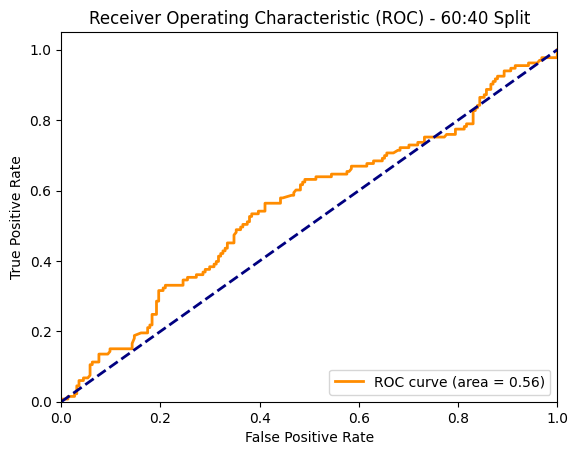

In [10]:
# Split the dataset (60:40)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state=42)

# Initialize and train logistic regression model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = recall
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Display metrics
print("60:40 Split - Logistic Regression Results")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - 60:40 Split')
plt.legend(loc="lower right")
plt.show()

## Now K Nearest Neighbors:

## 2. KNN: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split. Run your KNN choosing 3 nearest neighbors.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

Part II: Repeat the above with neighbors = 5.

Compare the results between Part 1 and Part 2. Which neighbor selection gave you better results?

KNN with 3 Neighbors Results:
Accuracy: 0.5182
Precision: 0.3333
Recall (Sensitivity): 0.2932
Specificity: 0.6518
F1 Score: 0.3120
Confusion Matrix:
 [[146  78]
 [ 94  39]]


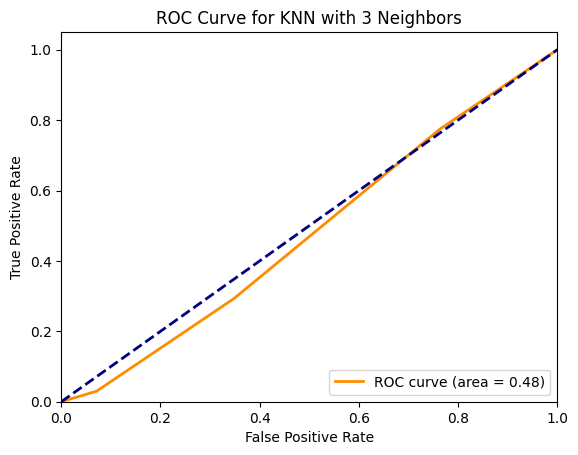

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Define the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sensitivity and Specificity
sensitivity = recall
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("KNN with 3 Neighbors Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN with 3 Neighbors')
plt.legend(loc="lower right")
plt.show()

KNN with 5 Neighbors Results:
Accuracy: 0.5126
Precision: 0.2970
Recall (Sensitivity): 0.2256
Specificity: 0.6830
F1 Score: 0.2564
Confusion Matrix:
 [[153  71]
 [103  30]]


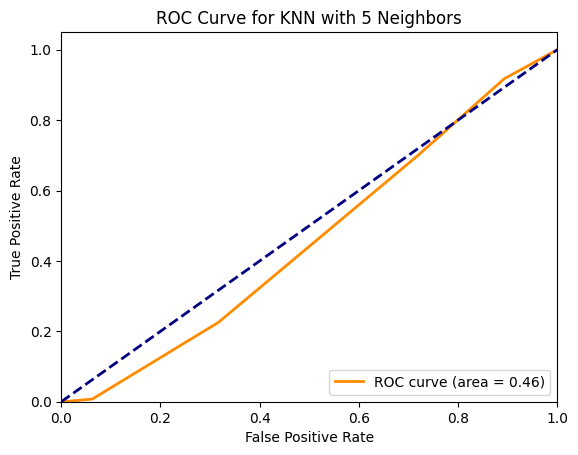

In [12]:
# Define the KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sensitivity and Specificity
sensitivity = recall
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("KNN with 5 Neighbors Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN with 5 Neighbors')
plt.legend(loc="lower right")
plt.show()

## Finally, Tree-Methods:

## 3. Decision Tree: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. **Plot** the ROC curve.

Part II: Repeat the above with a 50:50 train test split.

Compare the results between Part 1 and Part 2. Which split gave you better results?

Try a Random Forest Classifier as well. Works very similarly to how a decision tree does.

Decision Tree Results with 80:20 Split:
Accuracy: 0.7039
Precision: 0.6842
Recall (Sensitivity): 0.5270
Specificity: 0.8286
F1 Score: 0.5954
Confusion Matrix:
 [[87 18]
 [35 39]]


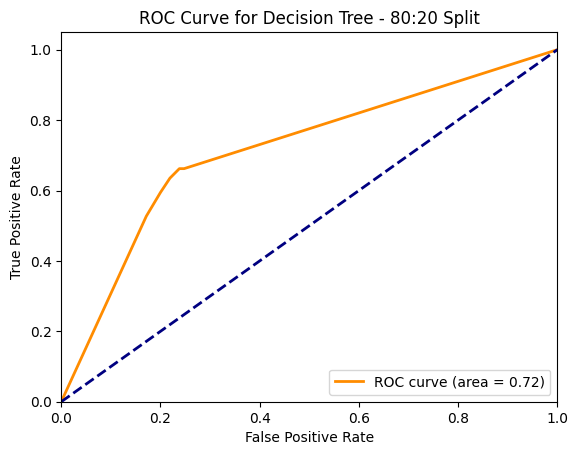

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = recall
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Display results
print("Decision Tree Results with 80:20 Split:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree - 80:20 Split')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Split the data with a different ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train and predict using the same model setup
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Evaluate the same metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = recall
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Display results
print("Decision Tree Results with 50:50 Split:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Decision Tree Results with 50:50 Split:
Accuracy: 0.6480
Precision: 0.5663
Recall (Sensitivity): 0.5251
Specificity: 0.7303
F1 Score: 0.5449
Confusion Matrix:
 [[195  72]
 [ 85  94]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)[:, 1]